In [1]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random

In [2]:
USE_CUDA = torch.cuda.is_available() # GPU를 사용가능하면 True, 아니라면 False를 리턴
device = torch.device("cuda" if USE_CUDA else "cpu") # GPU 사용 가능하면 사용하고 아니면 CPU 사용
print("다음 기기로 학습합니다:", device)

다음 기기로 학습합니다: cpu


In [3]:
# 랜덤 시드 고정
# for reproducibility
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [4]:
# hyperparameters : 하이퍼파라메터 변수 선언
training_epochs = 100
batch_size = 100

In [5]:
# MNIST dataset
mnist_train = dsets.MNIST(root='C:/Users/gih54/Documents/MNIST_data/', # 데이터 다운로드 경로
                          train=True, # train 인자 true : 훈련 데이터, false : 테스트 데이터
                          transform=transforms.ToTensor(), # transform 은 현재 데이터를 파이토치 텐서로 변환
                          download=True)

mnist_test = dsets.MNIST(root='C:/Users/gih54/Documents/MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

In [6]:
# 데이터로더(DataLoader) 사용
data_loader = DataLoader(
    dataset=mnist_train,
    batch_size=batch_size, # 배치 크기
    shuffle=True,
    drop_last=True # 마지막 배치 버릴 것인지 확인
)

In [25]:
# Drop_last 를 하는 이유 : 
# 마지막 배치가 다른 배치보다 작으면 학습 시 경사하강법을 사용할 때 마지막 배치가 상대적으로 과대평가 되기 때문

In [7]:
# 모델 설계 : input_dim = 784, output_dim = 10
# MNIST data image of shape 28 * 28 = 784
linear = nn.Linear(784, 10, bias=True).to(device) # bias : 편향 사용 여부, to 함수 : 연산을 어디서 수행할지 정한다

In [8]:
# 비용 함수 및 옵티마이저 정의
criterion = nn.CrossEntropyLoss().to(device) # 내부적으로 소프트맥스 함수 포함
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

In [28]:
for epoch in range(training_epochs): # 앞서 training_epochs의 값은 15로 정함
    avg_cost = 0
    total_batch = len(data_loader)

    for X, Y in data_loader:
        # 배치 크기가 100 이므로 아래 연산에서 X는 (100, 784)의 텐서가 된다
        X = X.view(-1, 28 * 28).to(device)
        # 레이블은 원-핫 인코딩이 된 상태가 아니라 0 ~ 9 의 정수
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print("Epoch:", "%4d" % (epoch + 1), "cost = ", "{:.9f}".format(avg_cost))

print("Learning Finished")

Epoch:    1 cost =  0.535544574
Epoch:    2 cost =  0.359057993
Epoch:    3 cost =  0.331079751
Epoch:    4 cost =  0.316525728
Epoch:    5 cost =  0.306948930
Epoch:    6 cost =  0.300137699
Epoch:    7 cost =  0.294947743
Epoch:    8 cost =  0.290830970
Epoch:    9 cost =  0.287210494
Epoch:   10 cost =  0.284448504
Epoch:   11 cost =  0.281921238
Epoch:   12 cost =  0.279632837
Epoch:   13 cost =  0.277613372
Epoch:   14 cost =  0.276087880
Epoch:   15 cost =  0.274483055
Epoch:   16 cost =  0.272694856
Epoch:   17 cost =  0.271565616
Epoch:   18 cost =  0.270498157
Epoch:   19 cost =  0.269309670
Epoch:   20 cost =  0.268043190
Epoch:   21 cost =  0.267293990
Epoch:   22 cost =  0.266353637
Epoch:   23 cost =  0.265478343
Epoch:   24 cost =  0.264733255
Epoch:   25 cost =  0.263967007
Epoch:   26 cost =  0.263162106
Epoch:   27 cost =  0.262511343
Epoch:   28 cost =  0.261694133
Epoch:   29 cost =  0.261295915
Epoch:   30 cost =  0.260573596
Epoch:   31 cost =  0.260140061
Epoch:  

Accuracy: 0.8711999654769897
Label:  5
Prediction:  5


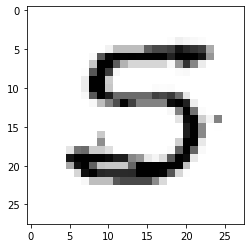

In [107]:
# 테스트 데이터를 사용하여 모델을 테스트한다.
with torch.no_grad(): # torch.no_grad()를 하면 gradient 계산을 수행하지 않는다.
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # MNIST 테스트 데이터에서 무작위로 하나를 뽑아서 예측을 해본다
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()